In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
itemArray = ["T-Shirt/Top", "Trouser", "Pull over", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [4]:
trainset = datasets.FashionMNIST(root = './mnist/data', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST(root = './mnist/data/Test', download = True, train = False, transform = transform)

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [6]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
        def forward(self, x):
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = F.relu(self.fc3(x))
            x = F.log_softmax(self.fc4(x), dim = 1)
            return x


In [7]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [19]:
epochs = 10
steps = 0

train_losses, test_losses = [], []

for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        logps = model(images)
        loss = criterion(logps, labels)

        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            for images, labels in testloader:
                images = images.view(images.shape[0], -1)
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    print("Training loss: {:.3f}".format(running_loss/len(trainloader)),
          "Test Loss: {:.3f}... ".format(test_loss/len(testloader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/10
Training loss: 0.259 Test Loss: 0.359...  Test Accuracy: 0.878
Epoch: 2/10
Training loss: 0.253 Test Loss: 0.374...  Test Accuracy: 0.871
Epoch: 3/10
Training loss: 0.252 Test Loss: 0.369...  Test Accuracy: 0.873
Epoch: 4/10
Training loss: 0.247 Test Loss: 0.360...  Test Accuracy: 0.878
Epoch: 5/10
Training loss: 0.238 Test Loss: 0.373...  Test Accuracy: 0.874
Epoch: 6/10
Training loss: 0.232 Test Loss: 0.370...  Test Accuracy: 0.876
Epoch: 7/10
Training loss: 0.227 Test Loss: 0.389...  Test Accuracy: 0.873
Epoch: 8/10
Training loss: 0.225 Test Loss: 0.375...  Test Accuracy: 0.880
Epoch: 9/10
Training loss: 0.224 Test Loss: 0.375...  Test Accuracy: 0.881
Epoch: 10/10
Training loss: 0.218 Test Loss: 0.391...  Test Accuracy: 0.883


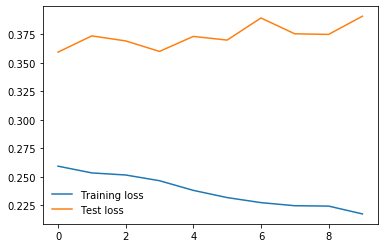

In [20]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label = 'Test loss')
plt.legend(frameon=False)

Model prediction: T-Shirt/Top, probability: 0.9999513626098633
Model prediction using the topk method: T-Shirt/Top, probability: 0.9999513626098633


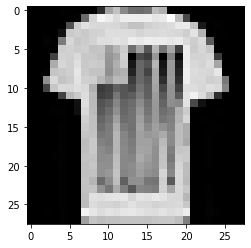

In [16]:
imageTestBatch, labelTestBatch = next(iter(testloader))
plt.imshow(imageTestBatch[0][0].numpy(), cmap='gray')

predictionTest = model.forward(imageTestBatch[0].view(1, -1))

with torch.no_grad():
    ps = F.softmax(predictionTest, dim = 1)
    
    maximum = torch.max(ps)
    itemIndex = (ps == maximum).nonzero()[0][1].item()
    print(f"Model prediction: {itemArray[itemIndex]}, probability: {maximum}")
    
    result = ps.topk(1, dim=1) #Returns the top 1 value of the tensor. if 2 is used instead of 1, it returns the 2 highests.
    print(f"Model prediction using the topk method: {itemArray[result[1].item()]}, probability: {result[0].item()}")
    